In [6]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import copy
from sympy import nsolve, Symbol

In [7]:
# initial conditions

r1 = 925000 # action sphere radius
mu = 398600 # gravitational parameter
r0 = 6371 # Earth radius

v_c = np.sqrt(mu/r0) # circular velocity on the planet surface, km/s

v_spacecraft_planet = 2.9 # spacecraft velocity relative to the planet, km/s



In [8]:
# setting hyperbola parameters

beta = 2 * math.asin(1 / (1 + (v_spacecraft_planet/v_c)**2))
alpha = math.acos(math.sin(beta/2))

x_start = - r1 * math.cos(alpha)
y_start = - r1 * math.sin(alpha)
x_finish = - r1 * math.cos(alpha)
y_finish = r1 * math.sin(alpha)

a = mu / (v_spacecraft_planet)**2
b = a * math.tan(alpha)
e = 1 / math.cos(alpha)
c = np.sqrt(a*a + b*b)

<IPython.core.display.Javascript object>


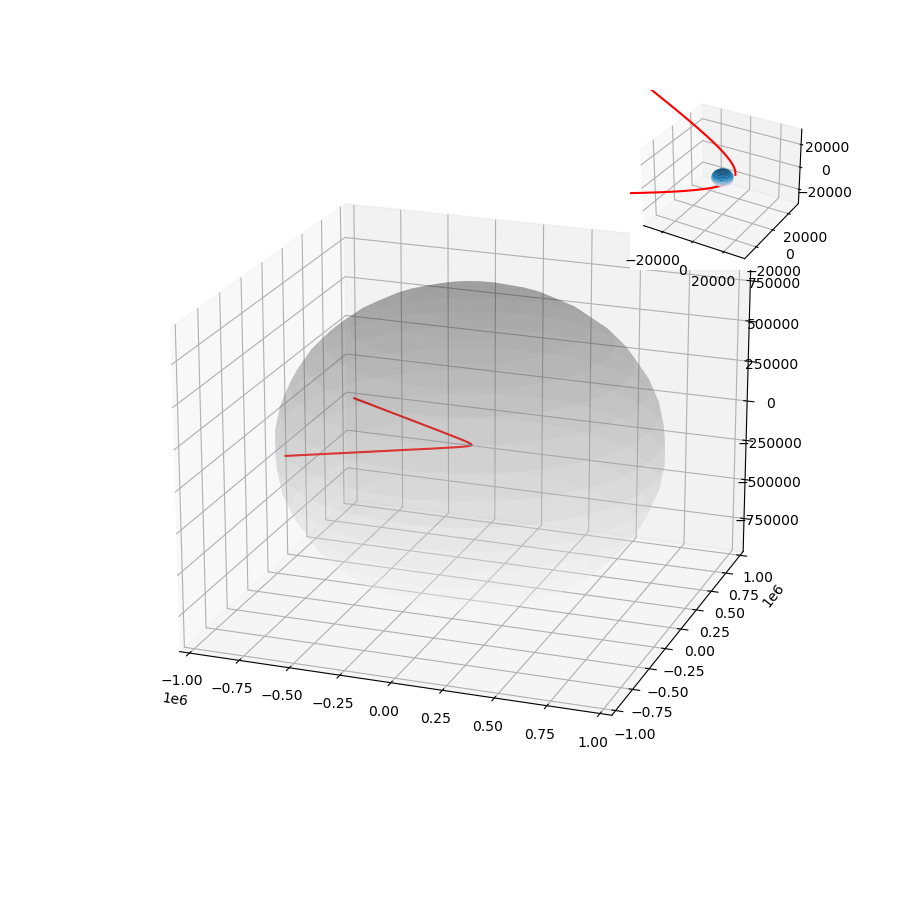

<ipython-input-9-d0e53eff6b4b>:25: RuntimeWarning: invalid value encountered in sqrt
  y_hyp = - b * np.sqrt((x_hyp)*(x_hyp)/(a*a)-1)


In [9]:
x_list = []
y_list = []
y_list_2 = []
z_list = []

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(projection='3d')

u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x0 = r0 * np.cos(u) * np.sin(v)
y0 = r0 * np.sin(u) * np.sin(v)
z0 = r0 * np.cos(v)
ax.plot_surface(x0, y0, z0, cmap=plt.cm.PuBu)

x1 = r1 * np.cos(u) * np.sin(v)
y1 = r1 * np.sin(u) * np.sin(v)
z1 = r1 * np.cos(v)
ax.plot_surface(x1, y1, z1, cmap=plt.cm.Greys, alpha=0.2)



z_list = np.full(500, 0)
for i in range(500):
    x_hyp = x_start  + ((-x_start)/500)*i
    y_hyp = - b * np.sqrt((x_hyp)*(x_hyp)/(a*a)-1)
    x_list.append(x_hyp + c)
    y_list.append(y_hyp)
    y_list_2.append(-y_hyp)
    
ax.plot3D(x_list, y_list, z_list, 'red')
ax.plot3D(x_list, y_list_2, z_list, 'red')

ax_new = fig.add_axes([0.7, 0.7, 0.2, 0.2], projection='3d') # the position of zoom-out plot compare to the ratio of zoom-in plot 
ax_new.set_xlim([-5 * r0, 5 * r0])
ax_new.set_ylim([-5 * r0, 5 * r0])
ax_new.set_zlim([-5 * r0, 5 * r0])
ax_new.plot_surface(x0, y0, z0, cmap=plt.cm.PuBu)
ax_new.plot3D(x_list, y_list, z_list, 'red')
ax_new.plot3D(x_list, y_list_2, z_list, 'red')

ax.view_init(20, -70)
plt.show()


In [10]:
delta_v = 2 * v_spacecraft_planet * math.sin(beta/2)
delta_v

5.112741469322921